### This notebook analyzes a dataset containing happiness scores of various countries. The analysis involves cleaning the data to remove inconsistencies and duplicates, followed by visualizations to draw meaningful conclusions.

## <font color='blue'>Importing the necessary libraries: </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## <font color='blue'>Loading all of the CSV files to their corresponding year DataFrame variables, then adding a year column to show what year the data was collected from:</font>

In [2]:
# reading CSV files
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')


data_frames = [df_2015,df_2016,df_2017,df_2018,df_2019]
years = [2015,2016,2017,2018,2019]

# adding the year to each dataframe
for i,x in enumerate(data_frames):
    x['Year'] = years[i] 



# <font color='red'>The data should be cleaned first before data visualization and analysis:</font>

## <font color='blue'>Uniting the column names accross all dataframes using a map:</font>

In [3]:
#creating map
column_mapping = {
    'Score': 'Happiness Score',
    'Happiness.Score':'Happiness Score',
    'Economy (GDP per Capita)': 'GDP per capita',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom to make life choices' :'Freedom',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Happiness.Rank':'Happiness Rank',
    'Overall rank':'Happiness Rank',
    'Country or region':'Country',
    'Economy..GDP.per.Capita.':'GDP per capita',
    'Health..Life.Expectancy.':'Healthy life expectancy',
    'Dystopia.Residual':'Dystopia Residual',
    'Trust..Government.Corruption.':'Perceptions of corruption'
}

# apply the mapping to column names of each dataframe
for df in data_frames:
    df.rename(columns=column_mapping, inplace=True)


## <font color='blue'>Dropping irrelevant columns which wont be used in this analysis:</font>

In [4]:
df_2015.drop(columns=['Standard Error'],inplace=True)
df_2016.drop(columns=['Lower Confidence Interval','Upper Confidence Interval'],inplace=True)
df_2017.drop(columns=['Whisker.high','Whisker.low'],inplace=True)

## <font color='blue'>Calculating and adding the Dystopia Residual column values by subtracting the summation of the other scores from the total Score value:</font>

In [5]:
df_2018['Dystopia Residual'] = df_2018['Happiness Score']-(df_2018['GDP per capita']+df_2018['Social support']+df_2018['Healthy life expectancy']+df_2018['Freedom']+df_2018['Perceptions of corruption']+df_2018['Generosity'])
df_2019['Dystopia Residual'] = df_2019['Happiness Score']-(df_2019['GDP per capita']+df_2019['Social support']+df_2019['Healthy life expectancy']+df_2019['Freedom']+df_2019['Perceptions of corruption']+df_2019['Generosity'])

## <font color='blue'>Inspecting the data types and column names for a inconsistant data before merging together:</font>

In [6]:
df_2015.info()
df_2016.info()
df_2017.info()
df_2018.info()
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    158 non-null    object 
 1   Region                     158 non-null    object 
 2   Happiness Rank             158 non-null    int64  
 3   Happiness Score            158 non-null    float64
 4   GDP per capita             158 non-null    float64
 5   Social support             158 non-null    float64
 6   Healthy life expectancy    158 non-null    float64
 7   Freedom                    158 non-null    float64
 8   Perceptions of corruption  158 non-null    float64
 9   Generosity                 158 non-null    float64
 10  Dystopia Residual          158 non-null    float64
 11  Year                       158 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 14.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex

- ### <font color='green'>All of the dataframes have 11 columns in common. The Region column, however, is missing for years 2017, 2018, and 2019. In addition, there are two null values in year 2018 fields "Perceptions of corruption" and "Dystopia Residual".</font> 
- ### <font color='purple'>These missing values will be dealt with after merging.</font>

## <font color='blue'>Checking if any of the dataframes have duplicated data:</font>

In [7]:
df_2015.duplicated().any()

False

In [8]:
df_2016.duplicated().any()

False

In [9]:
df_2017.duplicated().any()

False

In [10]:
df_2018.duplicated().any()

False

In [11]:
df_2019.duplicated().any()

False

### <font color='green'>There are no duplicated data in any of the dataframes.</font> 

## <font color='blue'>Merging all of the data frames together:</font>

In [12]:
# merging the dataframes together
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)
df  

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,0.46700,2019
778,Tanzania,NaN,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0.53100,2019
779,Afghanistan,NaN,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,1.79200,2019
780,Central African Republic,NaN,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2.45700,2019


## <font color='blue'>There are missing Region values:</font>

In [13]:
df['Region'].isna().any()

True

## <font color='blue'>Filling missing Region values based on Country grouping:</font>

In [14]:
def fill_region(group):
    row = group.dropna()
    top = row.iloc[0] if row.shape[0]> 0 else np.nan
    return group.fillna(top)
    
    
df['Region'] = df['Region'].groupby(df['Country']).transform(fill_region)
df

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,0.46700,2019
778,Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0.53100,2019
779,Afghanistan,Southern Asia,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,1.79200,2019
780,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2.45700,2019


## <font color='blue'>Inspecting the remaining null regions:</font>

In [15]:
df[df['Region'].isna()]

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Year
347,Taiwan Province of China,NaN,33,6.422,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607,2017
385,"Hong Kong S.A.R., China",NaN,71,5.472,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633,2017
507,Trinidad & Tobago,NaN,38,6.192,1.223000,1.492000,0.564000,0.575000,0.019000,0.171000,2.148000,2018
527,Northern Cyprus,NaN,58,5.835,1.229000,1.211000,0.909000,0.495000,0.154000,0.179000,1.658000,2018
664,Trinidad & Tobago,NaN,39,6.192,1.231000,1.477000,0.713000,0.489000,0.016000,0.185000,2.081000,2019
689,Northern Cyprus,NaN,64,5.718,1.263000,1.252000,1.042000,0.417000,0.162000,0.191000,1.391000,2019
709,North Macedonia,NaN,84,5.274,0.983000,1.294000,0.838000,0.345000,0.034000,0.185000,1.595000,2019
745,Gambia,NaN,120,4.516,0.308000,0.939000,0.428000,0.382000,0.167000,0.269000,2.023000,2019


- ### <font color='green'>There are some null regions due to different reasons:
     - Same countries have different names for example ("Taiwan Province of China" is the same as "Taiwan").
     - There are some newly added countries in later years like Gambia.</font>

## <font color='blue'>Specifying the regions of the remaining null values by their geographical locations:</font>

In [16]:
df.loc[df['Country'] == "Hong Kong S.A.R., China",'Region'] = "Eastern Asia"
df.loc[df['Country'] == "Taiwan Province of China",'Region'] = "Eastern Asia"
df.loc[df['Country'] == "Trinidad & Tobago",'Region'] = "Latin America and Caribbean"
df.loc[df['Country'] == "Northern Cyprus",'Region'] = "Middle East and Northern Africa"
df.loc[df['Country'] == "Trinidad & Tobago",'Region'] = "Latin America and Caribbean"
df.loc[df['Country'] == "Northern Cyprus",'Region'] = "Middle East and Northern Africa"
df.loc[df['Country'] == "North Macedonia",'Region'] = "Central and Eastern Europe"
df.loc[df['Country'] == "Gambia",'Region'] = "Sub-Saharan Africa"

## <font color='blue'>Correcting country name inconsistancies by uniting their names:</font>

In [17]:
df.loc[df['Country'] == "Hong Kong S.A.R., China",'Country'] = "Hong Kong" 
df.loc[df['Country'] == "Taiwan Province of China",'Country'] = "Taiwan" 

## <font color='blue'>There are no more null regions</font>

In [18]:
df['Region'].isna().any()

False

## <font color='blue'>From a previous analysis, there were two null values ("Perceptions of corruption" and "Dystopia Residual") from the 2018 datafram. Identifying this observation to analyze:</font>

In [19]:
df[df['Perceptions of corruption'].isna()]

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Year
489,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,NaN,2018


- ### <font color='green'>Both missing values belong in the same observation.</font> 
## <font color='blue'>Inspecting similar observations from different years to use their existing information to fill in the missing values.</font>

In [20]:
df[df["Country"]=="United Arab Emirates"]

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Year
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,2.247430,2015
185,United Arab Emirates,Middle East and Northern Africa,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,2.215070,2016
335,United Arab Emirates,Middle East and Northern Africa,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,1.734704,2017
489,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096000,0.77600,0.670000,0.284000,NaN,0.186000,NaN,2018
646,United Arab Emirates,Middle East and Northern Africa,21,6.825,1.503000,1.31000,0.825000,0.598000,0.18200,0.262000,2.145000,2019


## <font color='blue'>The 2018 United Arab Emirates Perceptions of corruption value can be computed from the mean of the same values in the other years.</font>

In [21]:
percept_avg = df.loc[(df['Year'] != 2018) & (df['Country'] == "United Arab Emirates"), 'Perceptions of corruption'].mean()
df.at[489, 'Perceptions of corruption'] = percept_avg
percept_avg

0.3119823909258842

## <font color='blue'>Now that all values exist except one (Dystopia Residual), we can subtract the summation of the remainig features from the "Score" to find its value.</font>

In [22]:
dystopia_value = df.at[489, 'Happiness Score'] - (df.at[489, 'GDP per capita']+ df.at[489, 'Social support'] + df.at[489, 'Healthy life expectancy'] + df.at[489, 'Freedom'] +df.at[489, 'Perceptions of corruption'] + df.at[489, 'Generosity'])
df.at[489, 'Dystopia Residual'] = dystopia_value
dystopia_value

2.4500176090741164

In [23]:
df[df["Country"]=="United Arab Emirates"]

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Year
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.427270,1.12575,0.809250,0.641570,0.385830,0.264280,2.247430,2015
185,United Arab Emirates,Middle East and Northern Africa,28,6.573,1.573520,0.87114,0.729930,0.562150,0.355610,0.265910,2.215070,2016
335,United Arab Emirates,Middle East and Northern Africa,21,6.648,1.626343,1.26641,0.726798,0.608345,0.324490,0.360942,1.734704,2017
489,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096000,0.77600,0.670000,0.284000,0.311982,0.186000,2.450018,2018
646,United Arab Emirates,Middle East and Northern Africa,21,6.825,1.503000,1.31000,0.825000,0.598000,0.182000,0.262000,2.145000,2019


# <font color='red'>Now, the data should be clean and we can start with data visualization and analysis!</font>

## <font color='blue'>Which region has the highest happiness score, and which has the lowest?</font>

In [24]:
#grouping the data by region then finding the mean
grouped_region_happiness = df.groupby('Region')['Happiness Score'].mean().reset_index()

#getting regions with the max and min scores
highest = grouped_region_happiness.loc[grouped_region_happiness['Happiness Score'].idxmax()]
lowest = grouped_region_happiness.loc[grouped_region_happiness['Happiness Score'].idxmin()]

print("Region with highest happiness score:", highest)
print("Region with lowest happiness score:", lowest)



Region with highest happiness score: Region             Australia and New Zealand
Happiness Score                       7.2946
Name: 0, dtype: object
Region with lowest happiness score: Region             Sub-Saharan Africa
Happiness Score              4.190153
Name: 8, dtype: object


### <font color='green'>The highest average happiness score is 7.29 in the Australia and New Zealand region, this means they are the happiest region recorded. And the Sub-Saharan Africa region is the least happy having the lowest happines score average of 4.19.</font> 

### <font color='purple'> We can visualize this through a bar graph</font> 

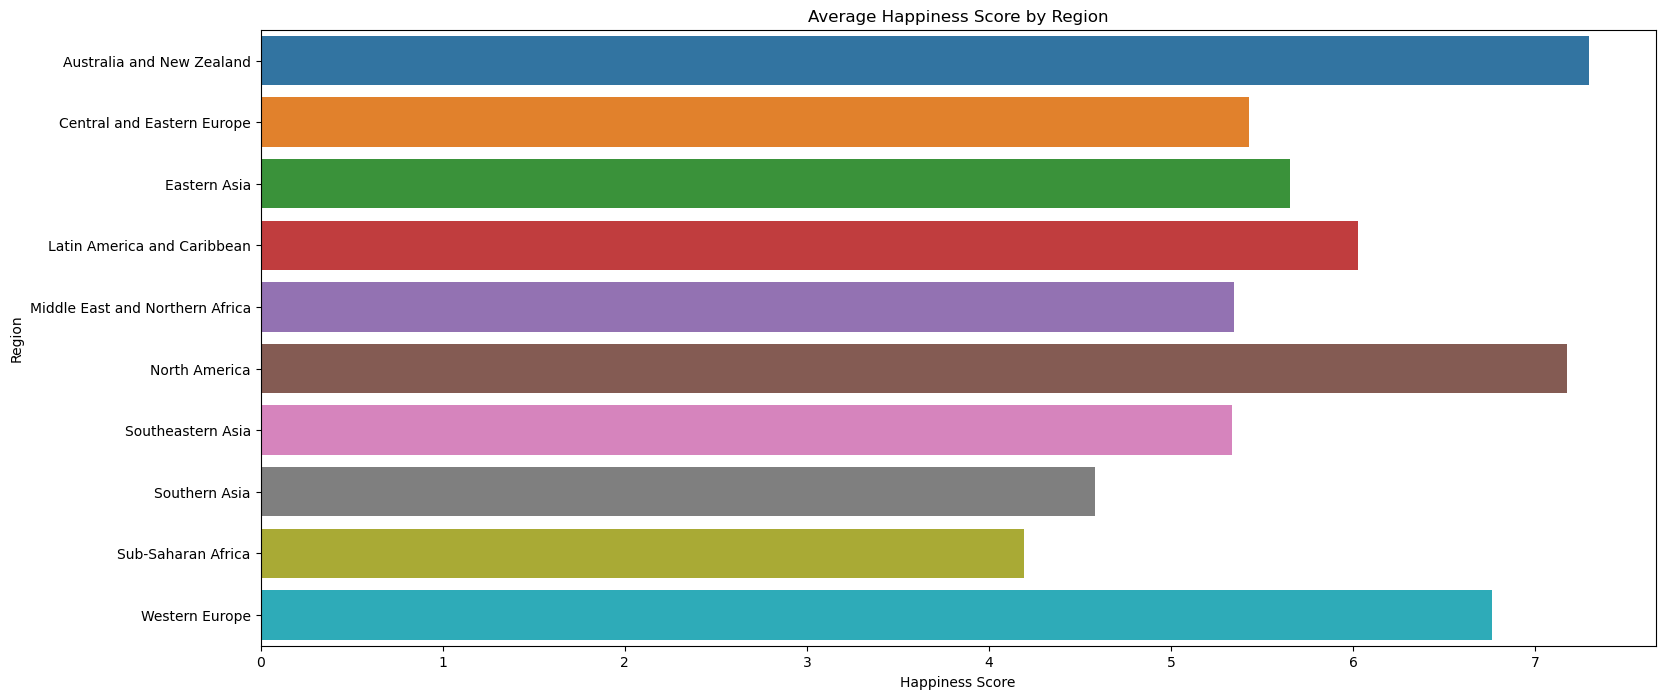

In [25]:
#plotting the bar graph
plt.figure(figsize=(18, 8))
sns.barplot(data=grouped_region_happiness, x='Happiness Score', y='Region')
plt.title('Average Happiness Score by Region')
plt.show()

### <font color='green'>The bar graph shows that the region "Australia and New Zealand" has the longest score bar reaching 7.3 and beating "North America", which makes it the happiest region. On the other hand, "Sub-Saharan Africa" has the shortest score bar making it the obvious least happy region with score 4.2.</font> 

## <font color='blue'>Which regions have countries with extreme (outliers) happiness scores? Find the regions and the countries.</font>

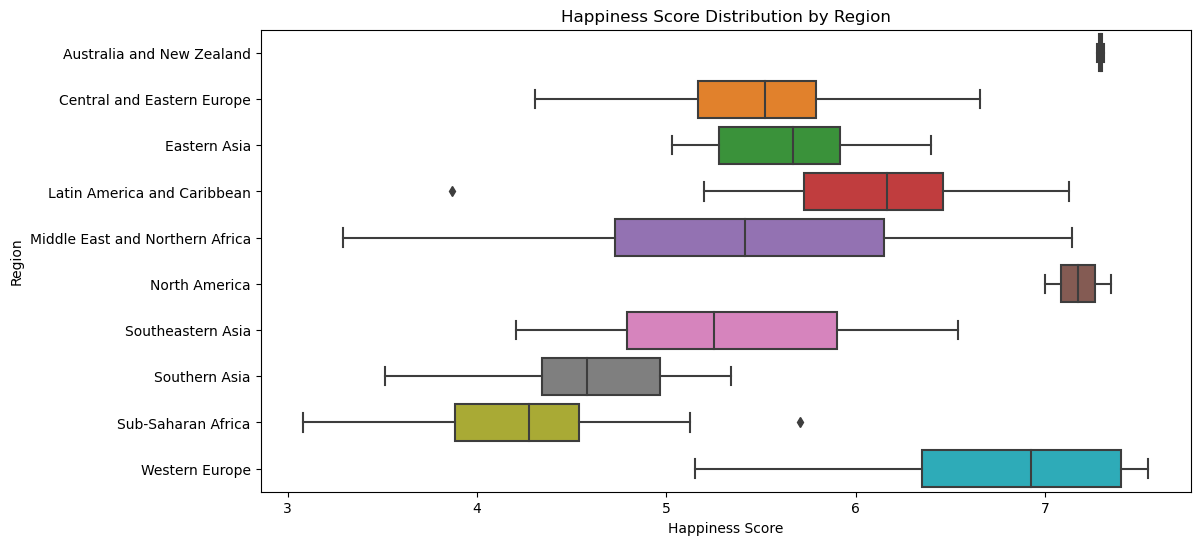

In [26]:
grouped = df.groupby(['Region','Country'])['Happiness Score'].mean().reset_index()


# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(y='Region', x='Happiness Score', data=grouped)
plt.title('Happiness Score Distribution by Region')
plt.show()

### <font color='green'>The Box plots show that "Latin America and Caribbean" region has an outlier country which has extremely low happiness scorein compare to the other countries in that region. Also, the blox plot of the "Sub-Saharan Africa" region has one outlier country which is way happier than the other countries in that region.</font>

### <font color='purple'> We can find these outlier countries and their corresponding average happiness scores by finding the wiskers bound and determinig which country has an average happiness score out of this bound</font> 

In [27]:
# this function finds the outliers in a given region
def get_outliers(data):
    #finding first and third Q
    Q1 = data['Happiness Score'].quantile(0.25)
    Q3 = data['Happiness Score'].quantile(0.75)
    #finding range
    IQR = Q3 - Q1
    #calculating outlire bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # returning countries out of range
    return data[(data['Happiness Score'] < lower_bound) | (data['Happiness Score'] > upper_bound)]

# getting the grouped data for Latin America and Caribbean region only then calling method
region_LAC = grouped[grouped['Region'] == 'Latin America and Caribbean']
LAC_outliers = get_outliers(region_LAC)

# getting the grouped data for Sub-Saharan Africa region only then calling method
region_SSA = grouped[grouped['Region'] == 'Sub-Saharan Africa']
SSA_outliers = get_outliers(region_SSA)

# displaying the outliers
print("***Outliers in Latin America and Caribbean***")
print(LAC_outliers)

print("\n***Outliers in Sub-Saharan Africa***")
print(SSA_outliers)

***Outliers in Latin America and Caribbean***
                         Region Country  Happiness Score
49  Latin America and Caribbean   Haiti           3.8656

***Outliers in Sub-Saharan Africa***
                 Region    Country  Happiness Score
127  Sub-Saharan Africa  Mauritius           5.7066


### <font color='green'>The outlier country in "Latin America and Caribbean" region is Haiti with an average happiness score of 3.8656. This shows that Haiti citizens are very unhappy in compare to other countries in that region. The outlier country in "Sub-Saharan Africa" region is Maurtius with an average happiness score of 5.7066. THis country has very happy citizens in compare to the rest of the region.</font>


## <font color='blue'>Show How the Global Happiness Score Changes Over Time.</font>


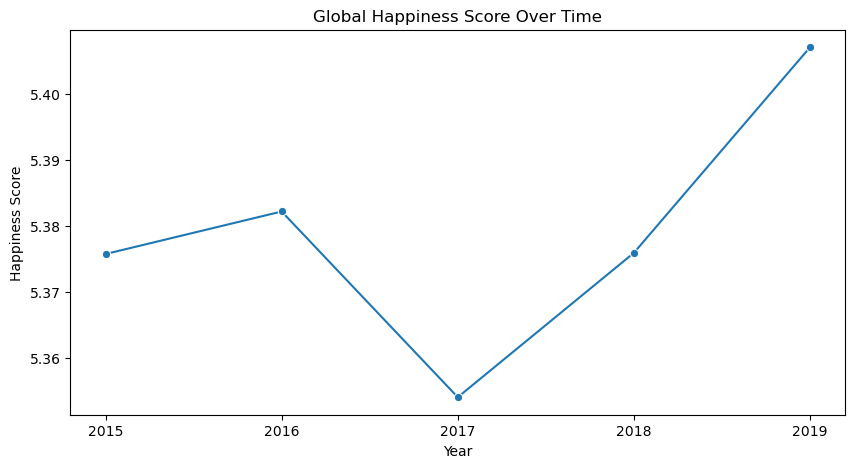

In [28]:
#calculating the global happiness score by year
global_over_time = df.groupby('Year')['Happiness Score'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 5))
sns.lineplot(data=global_over_time, x='Year', y='Happiness Score', marker='o')
plt.title('Global Happiness Score Over Time')
plt.xticks(ticks=[2015, 2016, 2017, 2018, 2019])
plt.show()

### <font color='green'>There was a decline in global happiness from 2015 to 2017, with the score dropping from around 5.38 to approximately 5.35. In addition, there was a noticeable increase starting in 2018, with the happiness score rising sharply to just above 5.40 by 2019. This upward trend shows that there were global factors which had a positive impact on the happiness of populations worldwide during this period.</font>

## <font color='blue'>Show how the Happiness Score Changes by Region along the years.</font>

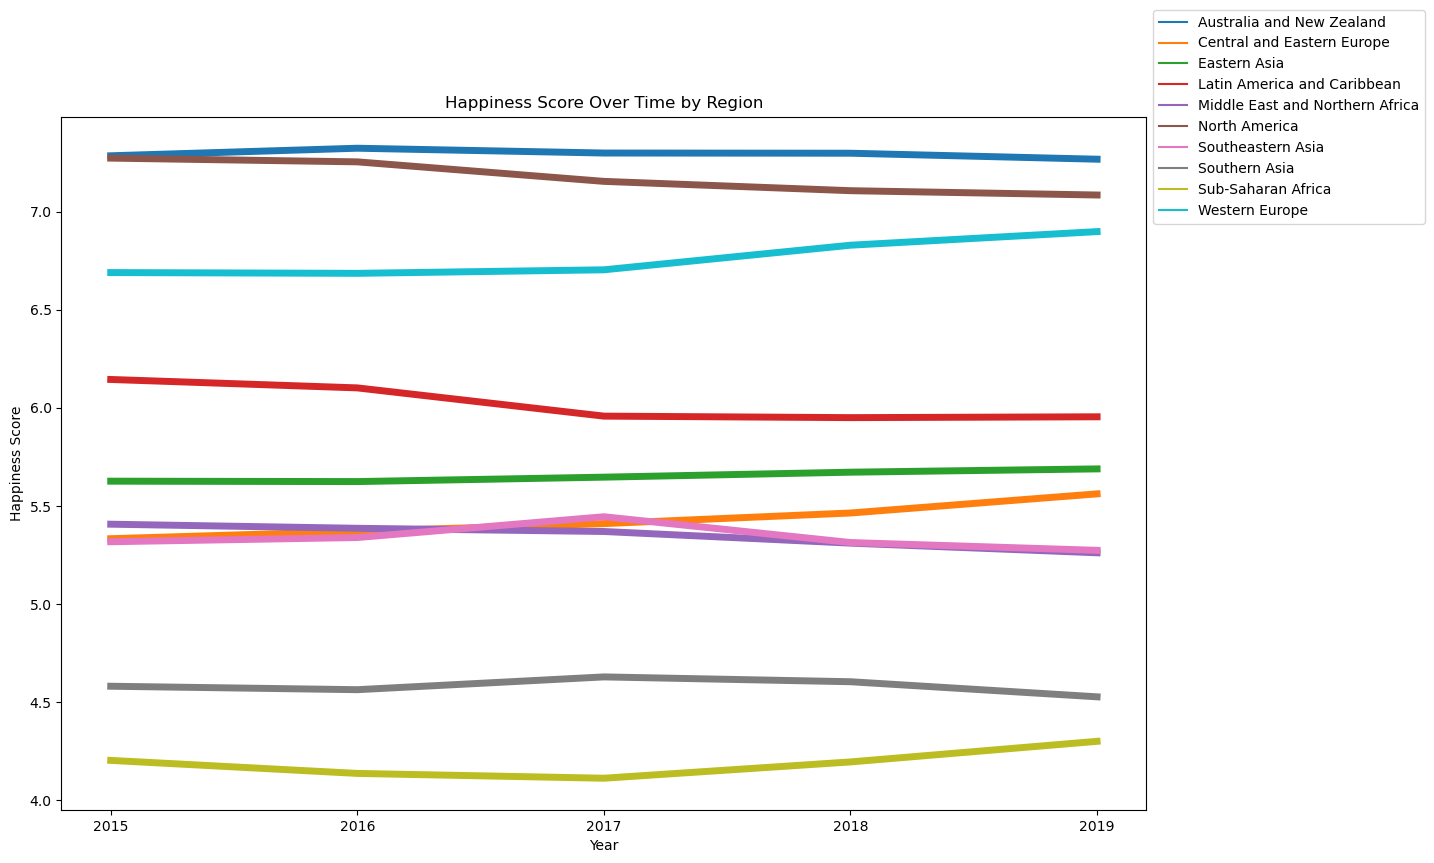

In [29]:
grouped = df.groupby(['Year','Region'])['Happiness Score'].mean().reset_index()

plt.figure(figsize=(14, 9))
sns.lineplot(x='Year', y='Happiness Score', hue='Region', data=grouped, linewidth=5)
plt.title('Happiness Score Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1, 1), loc='center left')
plt.xticks(ticks=[2015, 2016, 2017, 2018, 2019])
plt.show()



- ### <font color='green'>Australia and New Zealand, Western Europe, and North America remaind the regions with the highest happiness scores accross the years, which reflects an overall well-living conditions.</font> 

- ### <font color='green'>Latin America and Caribbean, Eastrern Asia, Middle East and North Africa, Central and Eastern Europe, and Southeastren Asia kept an intermidate happiness score, which shows acceptable living conditions.</font>

- ### <font color='green'>Southern Asia and Sub-Saharan Africa remaind with the lowest happiness scores along the years.</font>

- ### <font color='green'>Most regions remaind consistant in their average happiness score. However, there was a noticable decrease in Latin America and Caribbean score in 2017. In addition, regions like North America and Central and Eastern Europe experienced an increase in their score in 2018 and 2019.</font>

### <font color='purple'>These trends can be influenced by factors like economics, social support, and political stability.</font>

## <font color='blue'>Based on the data and your intuition, how you expect the global happiness score in the following 2 years?</font>

Based on the trends observed from 2015 to 2019, I anticipate that regions with historically high happiness scores, such as Australia and New Zealand, Western Europe, and North America, will likely maintain relatively stable or even slightly increasing happiness scores in the following years.

Similarly, regions with intermediate happiness scores, like Latin America and Caribbean, Eastern Asia, Middle East and North Africa, Central and Eastern Europe, and Southeastern Asia, may see minor fluctuations but are expected to generally maintain acceptable living conditions.

However, regions with consistently low happiness scores, such as Southern Asia and Sub-Saharan Africa, may continue to face challenges in improving overall well-being.